In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import sqlite3
import sqlalchemy as sqla
import scipy.stats as st
from scipy.stats import linregress

In [6]:
air_quality = "./Resources/CA_air_quality_annual_summary.csv"
air_quality1 = pd.read_csv(air_quality)
air_quality1.columns

Index(['state_code', 'county_code', 'site_num', 'parameter_code', 'poc',
       'latitude', 'longitude', 'datum', 'parameter_name', 'sample_duration',
       'pollutant_standard', 'metric_used', 'method_name', 'year',
       'units_of_measure', 'event_type', 'observation_count',
       'observation_percent', 'completeness_indicator', 'valid_day_count',
       'required_day_count', 'exceptional_data_count', 'null_data_count',
       'primary_exceedance_count', 'secondary_exceedance_count',
       'certification_indicator', 'num_obs_below_mdl', 'arithmetic_mean',
       'arithmetic_standard_dev', 'first_max_value', 'first_max_datetime',
       'second_max_value', 'second_max_datetime', 'third_max_value',
       'third_max_datetime', 'fourth_max_value', 'fourth_max_datetime',
       'first_max_non_overlapping_value', 'first_no_max_datetime',
       'second_max_non_overlapping_value', 'second_no_max_datetime',
       'ninety_nine_percentile', 'ninety_eight_percentile',
       'ninety_five_

In [7]:
air_data_year_df = air_quality1.loc[air_quality1["year"] == 2015, :]
air_data_year_df

,state_code,county_code,site_num,parameter_code,poc,latitude,longitude,datum,parameter_name,sample_duration,...,seventy_five_percentile,fifty_percentile,ten_percentile,local_site_name,address,state_name,county_name,city_name,cbsa_name,date_of_last_change
7,6,27,20,62101,1,36.057185,-117.861369,NAD83,Outdoor Temperature,1 HOUR,...,76.0,63.0,43.0,Coso Gate,COSO GATE,California,Inyo,NaN,"Bishop, CA",2020-05-21
10,6,27,20,61102,1,36.057185,-117.861369,NAD83,Wind Direction - Scalar,1 HOUR,...,212.0,132.0,33.0,Coso Gate,COSO GATE,California,Inyo,NaN,"Bishop, CA",2020-05-21
23,6,27,20,61101,1,36.057185,-117.861369,NAD83,Wind Speed - Scalar,1 HOUR,...,12.5,7.7,2.1,Coso Gate,COSO GATE,California,Inyo,NaN,"Bishop, CA",2020-05-21
60,6,27,1023,85101,4,37.362137,-118.417478,WGS84,PM10 - LC,1 HOUR,...,22.0,12.0,5.0,Bishop Tribe EMO,50 TU SU LANE,California,Inyo,Bishop,"Bishop, CA",2020-05-21
64,6,27,1023,62101,1,37.362137,-118.417478,WGS84,Outdoor Temperature,1 HOUR,...,71.0,59.0,36.0,Bishop Tribe EMO,50 TU SU LANE,California,Inyo,Bishop,"Bishop, CA",2020-05-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305601,6,79,2006,61104,1,35.256510,-120.669300,NAD83,Wind Direction - Resultant,1 HOUR,...,320.0,308.0,115.0,San Luis Obispo,"3220 SOUTH HIGUERA STREET, SAN LUIS OBISPO",California,San Luis Obispo,San Luis Obispo,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",2020-05-21
305614,6,79,2006,62101,2,35.256510,-120.669300,NAD83,Outdoor Temperature,1 HOUR,...,67.8,61.9,47.1,San Luis Obispo,"3220 SOUTH HIGUERA STREET, SAN LUIS OBISPO",California,San Luis Obispo,San Luis Obispo,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",2021-03-17
305617,6,79,2007,88101,1,35.046730,-120.587770,NAD83,PM2.5 - Local Conditions,24-HR BLK AVG,...,14.0,10.5,5.2,Arroyo Grande CDF,"2391 Willow Road, Arroyo Grande, California",California,San Luis Obispo,Arroyo Grande,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",2020-05-21
305620,6,79,2007,81102,2,35.046730,-120.587770,NAD83,PM10 Total 0-10um STP,24-HR BLK AVG,...,40.0,29.0,13.0,Arroyo Grande CDF,"2391 Willow Road, Arroyo Grande, California",California,San Luis Obispo,Arroyo Grande,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",2020-05-21


In [8]:
air_data_year_type_df = air_data_year_df.loc[air_data_year_df["parameter_name"] == "PM2.5 - Local Conditions", :]
air_data_year_type_df

,state_code,county_code,site_num,parameter_code,poc,latitude,longitude,datum,parameter_name,sample_duration,...,seventy_five_percentile,fifty_percentile,ten_percentile,local_site_name,address,state_name,county_name,city_name,cbsa_name,date_of_last_change
406,6,27,1003,88101,3,36.487823,-117.871036,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,7.2,5.0,2.7,Keeler,"KEELER, 190 Cerro Gordo Road",California,Inyo,Keeler,"Bishop, CA",2020-05-21
430,6,27,1003,88101,3,36.487823,-117.871036,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,7.2,5.0,2.7,Keeler,"KEELER, 190 Cerro Gordo Road",California,Inyo,Keeler,"Bishop, CA",2020-05-21
546,6,27,1003,88101,3,36.487823,-117.871036,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,7.2,5.0,2.7,Keeler,"KEELER, 190 Cerro Gordo Road",California,Inyo,Keeler,"Bishop, CA",2020-05-21
618,6,27,1003,88101,3,36.487823,-117.871036,WGS84,PM2.5 - Local Conditions,1 HOUR,...,7.3,4.8,1.2,Keeler,"KEELER, 190 Cerro Gordo Road",California,Inyo,Keeler,"Bishop, CA",2020-05-21
705,6,27,1003,88101,3,36.487823,-117.871036,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,7.2,5.0,2.7,Keeler,"KEELER, 190 Cerro Gordo Road",California,Inyo,Keeler,"Bishop, CA",2020-05-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305249,6,79,2004,88101,1,35.020830,-120.563880,WGS84,PM2.5 - Local Conditions,1 HOUR,...,11.0,7.0,3.0,Mesa2,"1300 GUADALUPE RD., NIPOMO, CA., 93444",California,San Luis Obispo,Nipomo,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",2020-05-21
305250,6,79,2004,88101,1,35.020830,-120.563880,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,10.8,8.2,4.0,Mesa2,"1300 GUADALUPE RD., NIPOMO, CA., 93444",California,San Luis Obispo,Nipomo,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",2020-05-21
305385,6,79,8001,88101,3,35.491580,-120.668040,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,16.5,11.8,4.0,Atascadero (original site),"6005 LEWIS AVENUE, ATASCADERO, CA 93422",California,San Luis Obispo,Atascadero,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",2020-05-21
305544,6,79,2006,88101,3,35.256510,-120.669300,NAD83,PM2.5 - Local Conditions,24-HR BLK AVG,...,7.0,5.2,2.1,San Luis Obispo,"3220 SOUTH HIGUERA STREET, SAN LUIS OBISPO",California,San Luis Obispo,San Luis Obispo,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",2021-03-17


In [9]:
air_data_df = air_data_year_type_df.loc[air_data_year_type_df["sample_duration"] == "24-HR BLK AVG",:]
air_data_df

,state_code,county_code,site_num,parameter_code,poc,latitude,longitude,datum,parameter_name,sample_duration,...,seventy_five_percentile,fifty_percentile,ten_percentile,local_site_name,address,state_name,county_name,city_name,cbsa_name,date_of_last_change
406,6,27,1003,88101,3,36.487823,-117.871036,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,7.2,5.0,2.7,Keeler,"KEELER, 190 Cerro Gordo Road",California,Inyo,Keeler,"Bishop, CA",2020-05-21
430,6,27,1003,88101,3,36.487823,-117.871036,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,7.2,5.0,2.7,Keeler,"KEELER, 190 Cerro Gordo Road",California,Inyo,Keeler,"Bishop, CA",2020-05-21
546,6,27,1003,88101,3,36.487823,-117.871036,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,7.2,5.0,2.7,Keeler,"KEELER, 190 Cerro Gordo Road",California,Inyo,Keeler,"Bishop, CA",2020-05-21
705,6,27,1003,88101,3,36.487823,-117.871036,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,7.2,5.0,2.7,Keeler,"KEELER, 190 Cerro Gordo Road",California,Inyo,Keeler,"Bishop, CA",2020-05-21
1659,6,27,2,88101,1,37.360684,-118.330783,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,8.4,5.0,1.8,White Mountain Research Center - Owens Valley Lab,"WMRC/NCORE, 3000 E. LINE ST., BISHOP, CA. 93514",California,Inyo,NaN,"Bishop, CA",2020-05-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305192,6,79,2004,88101,1,35.020830,-120.563880,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,10.8,8.2,4.0,Mesa2,"1300 GUADALUPE RD., NIPOMO, CA., 93444",California,San Luis Obispo,Nipomo,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",2020-05-21
305250,6,79,2004,88101,1,35.020830,-120.563880,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,10.8,8.2,4.0,Mesa2,"1300 GUADALUPE RD., NIPOMO, CA., 93444",California,San Luis Obispo,Nipomo,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",2020-05-21
305385,6,79,8001,88101,3,35.491580,-120.668040,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,16.5,11.8,4.0,Atascadero (original site),"6005 LEWIS AVENUE, ATASCADERO, CA 93422",California,San Luis Obispo,Atascadero,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",2020-05-21
305544,6,79,2006,88101,3,35.256510,-120.669300,NAD83,PM2.5 - Local Conditions,24-HR BLK AVG,...,7.0,5.2,2.1,San Luis Obispo,"3220 SOUTH HIGUERA STREET, SAN LUIS OBISPO",California,San Luis Obispo,San Luis Obispo,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",2021-03-17


In [10]:
total_air_quality_df= air_data_df.groupby(["observation_count"]).mean()
total_air_quality_df =total_air_quality_df.rename(columns = {"observation_count": "AQI"})

In [11]:
total_air_quality_county_df = total_air_quality_df.groupby(["county_name"]).mean()
total_air_quality_county_df.head()

KeyError: 'county_name'

AttributeError: module 'matplotlib.pyplot' has no attribute 'shoair'

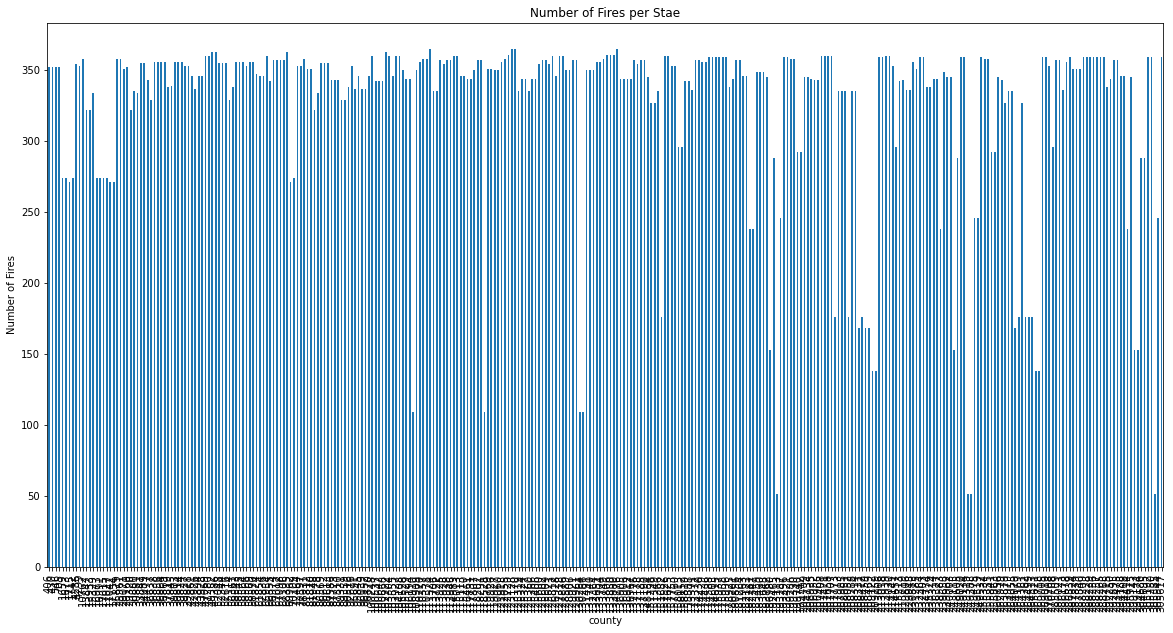

In [12]:
air_bar = air_data_df.plot(kind = "bar", y="observation_count", figsize=(20,10), title= "Number of Fires per Stae")

plt.xlabel('county')
plt.ylabel('Number of Fires')
air_bar.get_legend().remove()
plt.savefig("output/Figure7")
plt.shoair